In [41]:
import networkx as nx
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix,accuracy_score,f1_score
from xgboost import XGBClassifier

from time import time
from collections import Counter
import random
import os

In [42]:
df_train = pd.read_csv('Facebook.csv')
df_train.head()

,source_node,destination_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [43]:
df_train.shape


(88234, 2)

In [44]:
print("Number of NUll Values in Training Data : ",sum(df_train.isna().any(1)))
print("Number of Duplicate Values in Training Data : ",sum(df_train.duplicated()))

Number of NUll Values in Training Data :  0
Number of Duplicate Values in Training Data :  0


In [45]:
edge_list = df_train.values.tolist()

In [46]:
G = nx.DiGraph(edge_list,nodetype=np.int32)

In [47]:
nodes = G.nodes()
print("Number of Nodes : ",len(nodes))
print("Number of Edges : ",len(edge_list))

Number of Nodes :  4039
Number of Edges :  88234


In [48]:
subgraph = nx.DiGraph(random.sample(edge_list,200),nodetype=np.int32)

C:\Users\jain3\AppData\Local\Temp\ipykernel_10056\23092693.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(subgraph))


DiGraph with 366 nodes and 200 edges


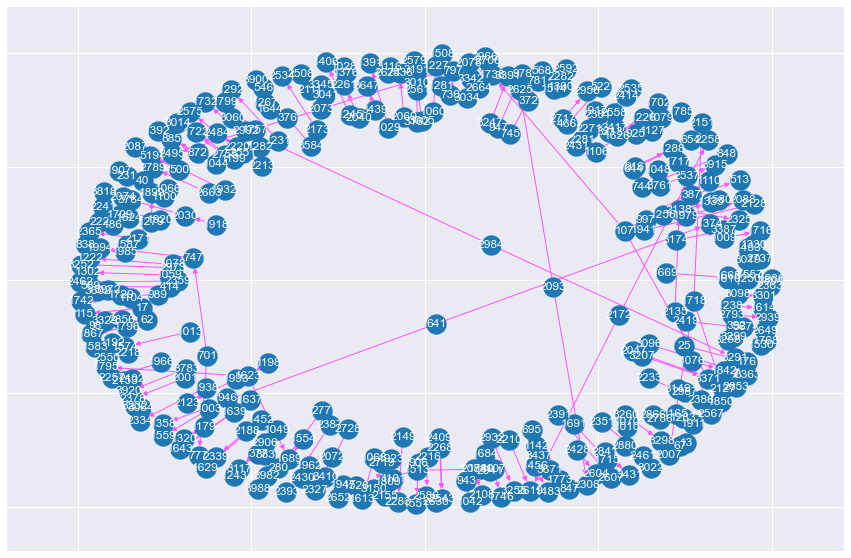

In [49]:
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(15, 10))
nx.draw_networkx(subgraph, pos, edge_color='#f5f', font_color='white', node_size=400)
plt.savefig("graph_sample.png")
print(nx.info(subgraph))

In [50]:
dict_in = dict(G.in_degree())
dict_out = dict(G.out_degree())

indegree_dist = list(dict_in.values())
outdegree_dist = list(dict_out.values())

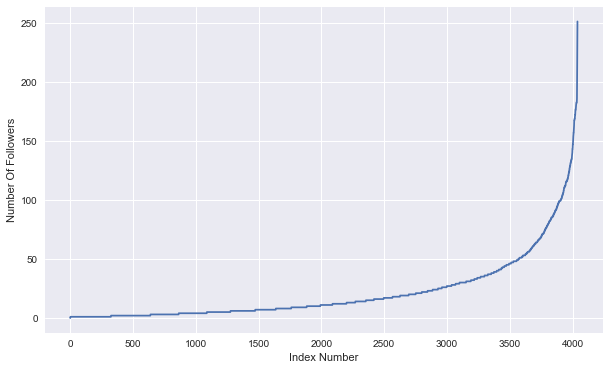

90 percentile value is 55.0
91 percentile value is 59.0
92 percentile value is 64.0
93 percentile value is 70.0
94 percentile value is 78.0
95 percentile value is 85.0
96 percentile value is 94.0
97 percentile value is 103.0
98 percentile value is 117.0
99 percentile value is 141.85999999999967

  *********************  

99.1 percentile value is 147.0
99.2 percentile value is 154.6959999999999
99.3 percentile value is 161.20199999999977
99.4 percentile value is 167.7720000000004
99.5 percentile value is 170.6199999999999
99.6 percentile value is 175.84799999999996
99.7 percentile value is 178.77199999999993
99.8 percentile value is 182.0
99.9 percentile value is 185.88600000000133
100.0 percentile value is 251.0


In [51]:
indegree_dist.sort()
plt.figure(figsize=(10, 6))
plt.plot(indegree_dist)
plt.xlabel('Index Number')
plt.ylabel('Number Of Followers')
plt.show()

# 90-99 percentile
for i in range(0,10):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

print()
print("  *********************  ")
print()

# 99-100 percentile
for i in range(1,11,1):
    print(99+(i/10),'percentile value is',np.percentile(indegree_dist,99+(i/10)))


# Observation:

# From 90 to 99 the people having less number of followers.
# From 99.1 to 99.9 the number of follower increases(very less number of peoples).

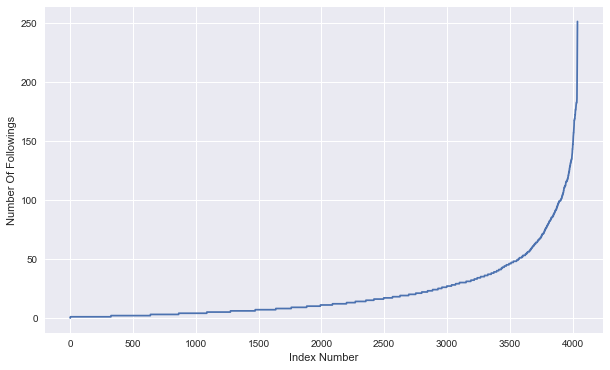

90 percentile value is 59.0
91 percentile value is 62.0
92 percentile value is 66.0
93 percentile value is 73.0
94 percentile value is 78.0
95 percentile value is 86.09999999999991
96 percentile value is 95.96000000000004
97 percentile value is 109.0
98 percentile value is 124.0
99 percentile value is 149.0

  *********************  

99.1 percentile value is 152.0
99.2 percentile value is 158.08799999999974
99.3 percentile value is 161.0
99.4 percentile value is 163.0
99.5 percentile value is 164.0
99.6 percentile value is 173.39199999999983
99.7 percentile value is 184.77199999999993
99.8 percentile value is 190.84799999999996
99.9 percentile value is 342.36400000005415
100.0 percentile value is 1043.0


In [52]:
outdegree_dist.sort()
plt.figure(figsize=(10, 6))
plt.plot(indegree_dist)
plt.xlabel('Index Number')
plt.ylabel('Number Of Followings')
plt.show()


# 90-99 percentile
for i in range(0,10):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

print()
print("  *********************  ")
print()

# 99-100 percentile
for i in range(1, 11, 1):
    print(99+(i/10), 'percentile value is', np.percentile(outdegree_dist, 99+(i/10)))

# There are very less people having more followings.

In [53]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is', sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist))
print('No of persons who have no followers' ,sum(np.array(indegree_dist)==0),'and % is',sum(np.array(indegree_dist)==0)*100/len(indegree_dist))

# It indicates that there are many people who are not using or not active on social network.

No of persons those are not following anyone are 376 and % is 9.309234959148304
No of persons who have no followers 2 and % is 0.04951720722951226


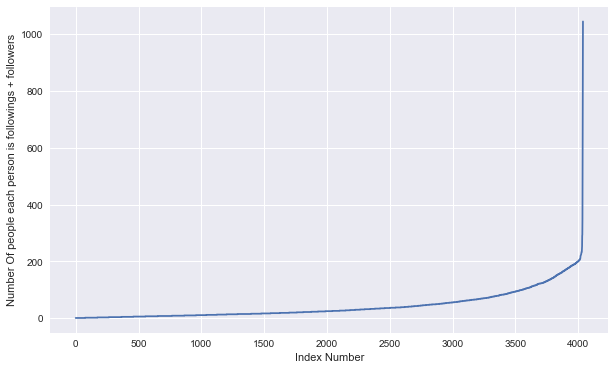

90 percentile value is 112.20000000000027
91 percentile value is 119.0
92 percentile value is 124.0
93 percentile value is 132.0
94 percentile value is 141.0
95 percentile value is 153.0999999999999
96 percentile value is 164.0
97 percentile value is 176.0
98 percentile value is 187.0
99 percentile value is 199.6199999999999

  *********************  

99.1 percentile value is 201.0
99.2 percentile value is 203.0
99.3 percentile value is 205.0
99.4 percentile value is 207.0
99.5 percentile value is 215.85999999999967
99.6 percentile value is 222.84799999999996
99.7 percentile value is 230.77199999999993
99.8 percentile value is 244.23999999999978
99.9 percentile value is 344.9860000000235
100.0 percentile value is 1045.0


In [54]:
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10, 6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index Number')
plt.ylabel('Number Of people each person is followings + followers')
plt.show()

# 90-99 percentile
for i in range(0,10):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

print()
print("  *********************  ")
print()

# 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

In [55]:
# Generating missing edges
edges = dict()

for edge in edge_list:
	edges[(edge[0], edge[1])] = 1

missing_edges = set([])

for a in range(1, len(nodes) + 1):
	for b in range(1, len(nodes) + 1):
		tmp = edges.get((a, b), -1)
		if tmp == -1 and a != b:
			missing_edges.add((a, b))

df_pos = df_train
df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])

print("Number of nodes in the graph with edges", df_pos.shape[0])
print("Number of nodes in the graph without edges", df_neg.shape[0])

Number of nodes in the graph with edges 88234
Number of nodes in the graph without edges 16221595


In [56]:
# Trian Test split
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)

print("Number of nodes in the Train data graph with edges", X_train_pos.shape[0]," : ",y_train_pos.shape[0])
print("Number of nodes in the Train data graph without edges", X_train_neg.shape[0]," : ", y_train_neg.shape[0])

print("Number of nodes in the Test data graph with edges", X_test_pos.shape[0]," : ",y_test_pos.shape[0])
print("Number of nodes in the Test data graph without edges", X_test_neg.shape[0]," : ",y_test_neg.shape[0])

Number of nodes in the Train data graph with edges 70587  :  70587
Number of nodes in the Train data graph without edges 12977276  :  12977276
Number of nodes in the Test data graph with edges 17647  :  17647
Number of nodes in the Test data graph without edges 3244319  :  3244319


In [57]:
X_train_pos.head(10)

,source_node,destination_node
17047,1029,1861
59352,2229,2556
40486,1929,2037
74983,2865,3196
4506,357,477
81920,3248,3395
68235,2553,2593
87719,3830,3966
6236,416,430
84457,3505,3526


In [58]:
X_test_pos.head(10)

,source_node,destination_node
67299,2489,2624
59989,2243,2458
35473,1623,1810
73618,2803,2881
27849,1332,1606
33502,1551,1845
13209,938,1733
77995,2986,3096
73200,2786,2862
15811,1003,1431


In [59]:
# Reading only the train positive (present edges) file
X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))
X_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_test = np.concatenate((y_test_pos,y_test_neg)) 

X_train.to_csv('train_X.csv',header=False,index=False)
X_test.to_csv('test_X.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv',header=False,index=False)

train_graph = nx.DiGraph(X_train_pos.values.tolist())


C:\Users\jain3\AppData\Local\Temp\ipykernel_10056\2078336760.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train_pos.append(X_train_neg,ignore_index=True)
C:\Users\jain3\AppData\Local\Temp\ipykernel_10056\2078336760.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test = X_test_pos.append(X_test_neg,ignore_index=True)


In [60]:
# Feature Engineering

# 1. Jaccard distance
def jaccard_for_followees(a, b):
    try:
        if len(set(train_graph.successors(a))) == 0 | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(
            b))))) / (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim


def jaccard_for_followers(a, b):
    try:
        if len(set(train_graph.predecessors(a))) == 0 | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(
            b)))))/(len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

# 2. Cosine distance

def cosine_for_followees(a, b):
    try:
        if len(set(train_graph.successors(a))) == 0 | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))) / \
            (math.sqrt(len(set(train_graph.successors(a)))
             * len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0


def cosine_for_followers(a, b):
    try:
        if len(set(train_graph.predecessors(a))) == 0 | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b))))) / \
            (math.sqrt(len(set(train_graph.predecessors(a))))
             * (len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

# 3. Page rank

pr = nx.pagerank(train_graph, alpha=0.85)
mean_pr=float(sum(pr.values())) / len(pr)
print('Page rank min', pr[min(pr, key=pr.get)])
print('Page rank max', pr[max(pr, key=pr.get)])
print('Page rank mean', float(sum(pr.values())) / len(pr))

# 4. Shortest path

def compute_shortest_path_length(a, b):
    p = -1
    try:
        if train_graph.has_edge(a, b):
            train_graph.remove_edge(a, b)
            p = nx.shortest_path_length(train_graph, source=a, target=b)
            train_graph.add_edge(a, b)
        else:
            p = nx.shortest_path_length(train_graph, source=a, target=b)
        return p
    except:
        return -1

# 5. Weakly connected components

wcc = list(nx.weakly_connected_components(train_graph))
def belongs_to_same_wcc(a, b):
    index = []
    if train_graph.has_edge(b, a):
        return 1
    if train_graph.has_edge(a, b):
        for i in wcc:
            if a in i:
                index = i
                break
        if (b in index):
            train_graph.remove_edge(a, b)
            if compute_shortest_path_length(a,b) ==-1:
                train_graph.add_edge(a, b)
                return 0
            else:
                train_graph.add_edge(a, b)
                return 1
        else:
            return 0
    else:
        for i in wcc:
            if a in i:
                index = i
                break
        if(b in index):
            return 1
        else:
            return 0

# 6. Adar Index

def calc_adar_in(a, b):
    sum = 0
    try:
        n = list(set(train_graph.successors(a)).intersection(
            set(train_graph.successors(b))))
        if len(n) != 0:
            for i in n:
                sum = sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

# 7. Follow Back

def follows_back(a, b):
    if train_graph.has_edge(b, a):
        return 1
    else:
        return 0

# 8. Katz Centrality

katz = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)
mean_katz=float(sum(katz.values())) / len(katz)
print('Katz Centrality min',katz[min(katz, key=katz.get)])
print('Katz Centrality max', katz[max(katz, key=katz.get)])
print('Katz Centrality mean',float(sum(katz.values())) / len(katz))

# 9. HITS(Hyperlink-Induced Topic Search)

hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
print('HITS min', hits[0][min(hits[0], key=hits[0].get)])
print('HITS max', hits[0][max(hits[0], key=hits[0].get)])
print('HITS mean', float(sum(hits[0].values())) / len(hits[0]))

Page rank min 8.014650212967957e-05
Page rank max 0.009980057311561218
Page rank mean 0.0002487562189054724
Katz Centrality min 0.01421187209483606
Katz Centrality max 0.03289442029503137
Katz Centrality mean 0.015632592851219526


c:\Users\jain3\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\link_analysis\hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


HITS min 0.0
HITS max 0.010465803001921223
HITS mean 0.00024875621890547295


In [61]:
# Sampling the dataset

filename = "train_X.csv"
n_train = sum(1 for line in open(filename))
s = 100000
skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))

filename = "test_X.csv"
n_test = sum(1 for line in open(filename))
s = 50000
skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))

print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data are",len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data are",len(skip_test))

Number of rows in the train data file: 13047863
Number of rows we are going to elimiate in train data are 12947863
Number of rows in the test data file: 3261966
Number of rows we are going to elimiate in test data are 3211966


In [62]:
df_final_train = pd.read_csv('train_X.csv', skiprows=skip_train, names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('train_y.csv', skiprows=skip_train, names=['indicator_link'])
print("Our train matrix size ", df_final_train.shape)
df_final_train.head(10)

Our train matrix size  (100001, 3)


,source_node,destination_node,indicator_link
0,1029,1861,1
1,1621,1833,1
2,3564,3821,1
3,2049,2612,1
4,2338,2461,1
5,2385,2543,1
6,3782,3945,1
7,3591,3706,1
8,1153,1287,1
9,2464,2630,1


In [63]:
df_final_test = pd.read_csv('test_X.csv', skiprows=skip_test, names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('test_y.csv', skiprows=skip_test, names=['indicator_link'])
print("Our test matrix size ", df_final_test.shape)
df_final_test.head(10)

Our test matrix size  (50001, 3)


,source_node,destination_node,indicator_link
0,2489,2624,1
1,960,1214,1
2,2109,2220,1
3,1589,1721,1
4,1120,1636,1
5,1517,1741,1
6,1517,1730,1
7,1004,1683,1
8,3055,3147,1
9,1341,1449,1


In [64]:
#calculating no of followers followees for source and destination
#calculating intersection of followers and followees for source and destination

def compute_features_stage1(df_final):
    num_followers_s = []
    num_followees_s = []
    num_followers_d = []
    num_followees_d = []
    inter_followers = []
    inter_followees = []
    for i, row in df_final.iterrows():
        try:
            s1 = set(train_graph.predecessors(row['source_node']))
            s2 = set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1 = set(train_graph.predecessors(row['destination_node']))
            d2 = set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))

    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees

df_final_train['num_followers_s'], df_final_train['num_followers_d'], df_final_train['num_followees_s'], df_final_train['num_followees_d'], df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)
df_final_test['num_followers_s'], df_final_test['num_followers_d'], df_final_test['num_followees_s'], df_final_test['num_followees_d'], df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)

In [65]:
# 1. Jaccard distance

#mapping jaccrd followers to train and test data
df_final_train['jaccard_followers'] = df_final_train.apply(
    lambda row: jaccard_for_followers(row['source_node'], row['destination_node']), axis=1)
df_final_test['jaccard_followers'] = df_final_test.apply(
    lambda row: jaccard_for_followers(row['source_node'], row['destination_node']), axis=1)

#mapping jaccrd followees to train and test data
df_final_train['jaccard_followees'] = df_final_train.apply(
    lambda row: jaccard_for_followees(row['source_node'], row['destination_node']), axis=1)
df_final_test['jaccard_followees'] = df_final_test.apply(
    lambda row: jaccard_for_followees(row['source_node'], row['destination_node']), axis=1)

# 2. Cosine distance

#mapping cosine followers to train and test data
df_final_train['cosine_followers'] = df_final_train.apply(
    lambda row: cosine_for_followers(row['source_node'], row['destination_node']), axis=1)
df_final_test['cosine_followers'] = df_final_test.apply(
    lambda row: cosine_for_followers(row['source_node'], row['destination_node']), axis=1)

#mapping cosine followees to train and test data
df_final_train['cosine_followees'] = df_final_train.apply(
    lambda row: cosine_for_followees(row['source_node'], row['destination_node']), axis=1)
df_final_test['cosine_followees'] = df_final_test.apply(
    lambda row: cosine_for_followees(row['source_node'], row['destination_node']), axis=1)

# 3. Page rank

#page rank for source and destination in Train and Test
df_final_train['page_rank_s'] = df_final_train.source_node.apply(
    lambda x: pr.get(x, mean_pr))
df_final_train['page_rank_d'] = df_final_train.destination_node.apply(
    lambda x: pr.get(x, mean_pr))

df_final_test['page_rank_s'] = df_final_test.source_node.apply(
    lambda x: pr.get(x, mean_pr))
df_final_test['page_rank_d'] = df_final_test.destination_node.apply(
    lambda x: pr.get(x, mean_pr))

# 4. Shortest path

#mapping shortest path on train
df_final_train['shortest_path'] = df_final_train.apply(
    lambda row: compute_shortest_path_length(row['source_node'], row['destination_node']), axis=1)
#mapping shortest path on test
df_final_test['shortest_path'] = df_final_test.apply(
    lambda row: compute_shortest_path_length(row['source_node'], row['destination_node']), axis=1)

# 5. Weakly connected components

#mapping same component of wcc or not on train
df_final_train['same_comp'] = df_final_train.apply(
    lambda row: belongs_to_same_wcc(row['source_node'], row['destination_node']), axis=1)
##mapping same component of wcc or not on train
df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(
    row['source_node'], row['destination_node']), axis=1)

# 6. Adar Index

#mapping adar index on train
df_final_train['adar_index'] = df_final_train.apply(
    lambda row: calc_adar_in(row['source_node'], row['destination_node']), axis=1)
#mapping adar index on test
df_final_test['adar_index'] = df_final_test.apply(
    lambda row: calc_adar_in(row['source_node'], row['destination_node']), axis=1)

# 7. Follow Back

#mapping followback or not on train
df_final_train['follows_back'] = df_final_train.apply(
    lambda row: follows_back(row['source_node'], row['destination_node']), axis=1)
#mapping followback or not on test
df_final_test['follows_back'] = df_final_test.apply(
    lambda row: follows_back(row['source_node'], row['destination_node']), axis=1)

# 8. Katz Centrality

#Katz centrality score for source and destination in Train and test
df_final_train['katz_s'] = df_final_train.source_node.apply(
    lambda x: katz.get(x, mean_katz))
df_final_train['katz_d'] = df_final_train.destination_node.apply(
    lambda x: katz.get(x, mean_katz))

df_final_test['katz_s'] = df_final_test.source_node.apply(
    lambda x: katz.get(x, mean_katz))
df_final_test['katz_d'] = df_final_test.destination_node.apply(
    lambda x: katz.get(x, mean_katz))

# 9. HITS(Hyperlink-Induced Topic Search)

#Hits algorithm score for source and destination in Train and test
df_final_train['hubs_s'] = df_final_train.source_node.apply(
    lambda x: hits[0].get(x, 0))
df_final_train['hubs_d'] = df_final_train.destination_node.apply(
    lambda x: hits[0].get(x, 0))

df_final_test['hubs_s'] = df_final_test.source_node.apply(
    lambda x: hits[0].get(x, 0))
df_final_test['hubs_d'] = df_final_test.destination_node.apply(
    lambda x: hits[0].get(x, 0))

#Hits algorithm score for source and destination in Train and Test
df_final_train['authorities_s'] = df_final_train.source_node.apply(
    lambda x: hits[1].get(x, 0))
df_final_train['authorities_d'] = df_final_train.destination_node.apply(
    lambda x: hits[1].get(x, 0))

df_final_test['authorities_s'] = df_final_test.source_node.apply(
    lambda x: hits[1].get(x, 0))
df_final_test['authorities_d'] = df_final_test.destination_node.apply(
    lambda x: hits[1].get(x, 0))


In [66]:
df_final_train.head(10)

,source_node,destination_node,indicator_link,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,jaccard_followers,...,shortest_path,same_comp,adar_index,follows_back,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d
0,1029,1861,1,7,80,57,1,2,1,0,...,2,1,0.495778,0,0.014724,0.021409,4.089243e-07,4.527902e-09,3.669039e-08,2.396975e-07
1,1621,1833,1,105,146,50,8,68,7,0,...,2,1,3.517484,0,0.023115,0.027359,6.193204e-07,1.086684e-07,4.334197e-07,4.914342e-07
2,3564,3821,1,4,11,7,9,1,1,0,...,2,1,0.756304,0,0.014499,0.015012,3.469757e-14,3.675156e-14,5.079800e-13,5.131578e-13
3,2049,2612,1,6,21,26,0,2,0,0,...,3,1,0.000000,0,0.014653,0.015876,3.139719e-05,0.000000e+00,1.289529e-04,1.638536e-04
4,2338,2461,1,53,76,27,22,30,10,0,...,2,1,5.045683,0,0.018590,0.020649,3.877474e-04,2.392481e-04,4.984514e-04,4.657715e-04
5,2385,2543,1,36,207,8,38,25,2,0,...,2,1,1.023976,0,0.017243,0.032894,1.343312e-04,1.927836e-03,4.481749e-04,7.115557e-03
6,3782,3945,1,16,27,9,2,6,0,0,...,3,1,0.000000,0,0.015386,0.016216,4.818456e-14,1.418140e-14,5.193718e-13,5.645714e-13
7,3591,3706,1,2,11,12,10,1,6,0,...,2,1,4.895424,0,0.014356,0.015020,7.568250e-14,5.139418e-14,3.506726e-15,5.389633e-13
8,1153,1287,1,25,18,89,37,8,22,0,...,2,1,11.409664,0,0.016081,0.015582,3.870878e-07,1.487560e-07,1.080359e-07,9.411125e-08
9,2464,2630,1,119,136,54,3,76,3,0,...,2,1,1.453498,0,0.024950,0.028114,4.158805e-03,2.500230e-04,7.692635e-03,6.772804e-03


In [67]:
df_final_test.head(10)

,source_node,destination_node,indicator_link,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,jaccard_followers,...,shortest_path,same_comp,adar_index,follows_back,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d
0,2489,2624,1,72,141,20,7,45,3,0,...,2,1,1.441060,0,0.020887,0.028047,1.766985e-03,5.854158e-04,4.769803e-03,7.592705e-03
1,960,1214,1,4,27,77,63,1,20,0,...,2,1,10.677926,0,0.014498,0.016265,2.010695e-07,3.771184e-07,1.734265e-08,1.288351e-07
2,2109,2220,1,21,56,76,91,13,48,0,...,2,1,24.540553,0,0.015828,0.018817,5.453140e-03,6.528580e-03,1.750358e-03,4.183267e-03
3,1589,1721,1,96,73,61,22,36,18,0,...,2,1,8.949247,0,0.022154,0.020627,3.125132e-07,1.731111e-07,3.764959e-07,2.573419e-07
4,1120,1636,1,10,49,31,10,6,2,0,...,2,1,1.220931,0,0.014939,0.018098,8.458693e-09,2.897996e-09,2.408737e-08,2.717333e-08
5,1517,1741,1,13,68,11,13,6,2,0,...,2,1,0.988131,0,0.015294,0.020377,4.652649e-08,1.293777e-07,5.144732e-08,2.644499e-07
6,1517,1730,1,13,137,11,28,9,4,0,...,2,1,1.997981,0,0.015294,0.025980,4.652649e-08,1.816029e-07,5.144732e-08,4.623956e-07
7,1004,1683,1,5,69,90,28,3,16,0,...,2,1,8.102819,0,0.014571,0.020294,3.308106e-07,1.795582e-07,4.867377e-08,2.836359e-07
8,3055,3147,1,3,3,2,0,2,0,0,...,2,1,0.000000,0,0.014431,0.014431,5.422880e-13,0.000000e+00,2.136364e-11,2.136057e-11
9,1341,1449,1,40,32,60,35,13,17,0,...,2,1,8.716852,0,0.017355,0.016739,3.943215e-07,4.810465e-07,1.853485e-07,1.545444e-07


In [68]:
# Target data

y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

# Droping unwanted columns and target values

df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [69]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(df_final_train,y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           min_child_weight=None, missing=nan,
                                   

In [70]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, ...)

In [71]:
y_train_pred = model.predict(df_final_train)
y_test_pred = model.predict(df_final_test)


In [72]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.951819075712881
Test f1 score 0.6298850574712643


In [73]:
confusion_matrix(y_test, y_test_pred).T


array([[49703,   112],
       [   49,   137]], dtype=int64)

In [74]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)

    A = (((C.T)/(C.sum(axis=1))).T)

    B = (C/C.sum(axis=0))
    plt.figure(figsize=(20, 4))

    labels = [0, 1]
    # representing A in heatmap format
    cmap = sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()


Train confusion_matrix


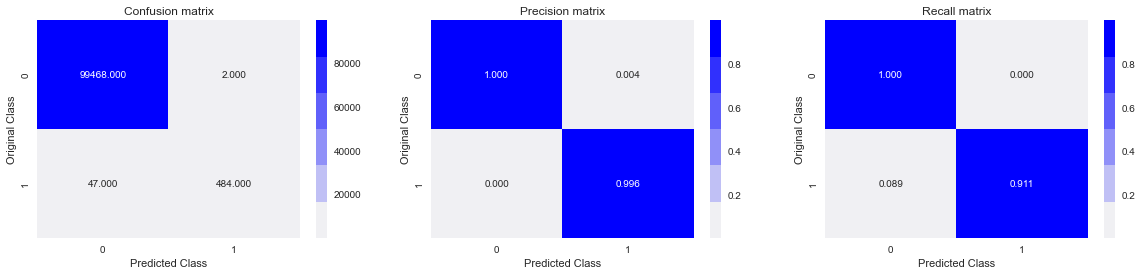

Test confusion_matrix


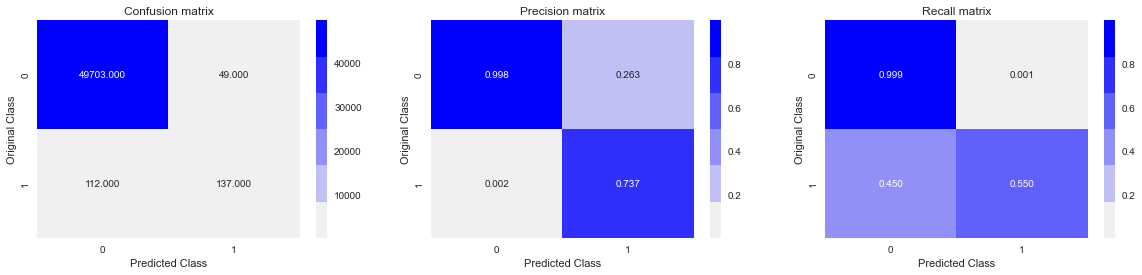

In [75]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

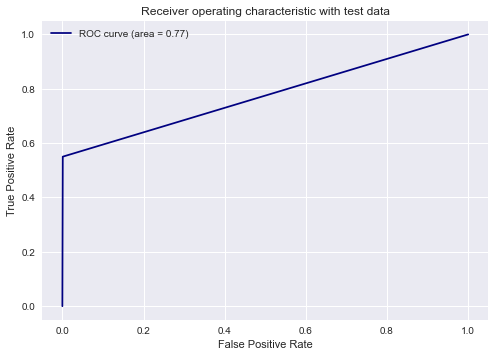

In [76]:
fpr, tpr, ths = roc_curve(y_test, y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy', label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()


In [77]:
acc = accuracy_score(y_test, y_test_pred, normalize=True)*float(100)
print(acc)


99.6780064398712


In [78]:
acc = accuracy_score(y_train, y_train_pred, normalize=True)*float(100)
print(acc)


99.9510004899951
